### Youtube as a political weapon :

Youtube is a main platform for sharing political videos. However, recently It was a main weapon to inflame the political polarisation in the United States and deepening the political conflict between the right and left. Using the YouNiverse dataset we try to answer those questions: 

1- Did the negativity sentiment and political polarization in political videos increase overtime?

2- Has Youtube has been used as a political weapon? Who initiated this tone and benefited from it?

3- Using also the "radicalization dataset" to further explore the use of youtube as a political weapon in the (pre-)election period for 2017

---

#### 1) Data Reduction:

The data is too big to fit in memory..and we are only interested in political videos. So we start by reducing the dataset to only keep those 3 categories:

`['Nonprofits & Activism', 'People & Blogs', 'News & Politics']`

In [2]:
#!pip install pyarrow
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
df_sb_f = pd.read_csv("data/df_timeseries_en.tsv.gz", compression="infer", sep="\t")
df_sb_f["datetime"] = pd.to_datetime(df_sb_f["datetime"])
df_sb_f.head(5)


,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [8]:
print("channel count in TimeSeries table:", df_sb_f['channel'].nunique())
df_sb_f["category"].unique()

chanell count in TimeSeries table: 133516


array(['Film and Animation', 'Music', 'Comedy', 'Gaming',
       'Science & Technology', 'Sports', 'Entertainment', 'Education',
       'Nonprofits & Activism', 'People & Blogs', 'Howto & Style',
       'News & Politics', 'Travel & Events', 'Autos & Vehicles',
       'Pets & Animals', nan], dtype=object)

In [9]:
df_sb_f = df_sb_f.loc[df_sb_f["category"].isin(['Nonprofits & Activism', 'People & Blogs', 'News & Politics'])]
print("channel count in TimeSeries table after filteration:", df_sb_f['channel'].nunique())

chanell count in TimeSeries table after filteration: 21163


Now we save the reduced timeseries table

In [10]:
df_sb_f.to_pickle("data/df_timeseries_reduced.tsv.gz")

In [11]:

df_ch_f = pd.read_csv("data/df_channels_en.tsv.gz", compression="infer", sep="\t")
df_ch_f["join_date"] = pd.to_datetime(df_ch_f["join_date"])
df_ch_f.head(5)


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [13]:
print("channel count in TimeSeries table", df_ch_f['channel'].nunique())
df_ch_f['category_cc'].unique()

channel count in TimeSeries table 136470


array(['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports',
       'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism',
       'People & Blogs', 'News & Politics', 'Science & Technology',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan],
      dtype=object)

In [15]:
df_ch_f = df_ch_f.loc[df_ch_f["category_cc"].isin(['Nonprofits & Activism', 'People & Blogs', 'News & Politics'])]
print("channel count in TimeSeries table after filteration:", df_ch_f['channel'].nunique())

channel count in TimeSeries table after filteration: 21645


In [16]:
df_ch_f.to_pickle("data/df_channels_reduced.tsv.gz")

In [13]:

count = 0
count_after = 0
chunksize = 10 ** 5
flag=False
for chunk in tqdm(pd.read_json("data/yt_metadata_en.jsonl.gz",lines=True, chunksize=chunksize)):
    count += chunk['display_id'].nunique() 
    chunk = chunk.loc[chunk["categories"].isin(['Nonprofits & Activism', 'People & Blogs', 'News & Politics'])]
    if not flag:
        flag=True
        chunk.to_csv('data/yt_metadata_reduced.tsv.gz', index=False)
    else:
        chunk.to_csv('data/yt_metadata_reduced.tsv.gz', index=False, header=False, mode='a')
    count_after += chunk['display_id'].nunique()

print("videos count: ", count)
print("videos count after reduction: ", count_after)


0it [00:02, ?it/s]

Index(['categories', 'channel_id', 'crawl_date', 'description',
       'dislike_count', 'display_id', 'duration', 'like_count', 'tags',
       'title', 'upload_date', 'view_count'],
      dtype='object')
videos count:  100000
videos count after reduction:  0


---
#### 2) Data Exploration & Processing:

General Data analysis on the three categories of channels we’re interested in

---
#### 3) Feasibility study:  

##### **Q1** Did the negativity sentiment and political polarization in political videos increase overtime?

To answer this question we need:
- a way to measure general sentiments
- a way to measure the Heat/plarization per video.

**a) measuring sentiment:**
    
[We use a pretrained model to do sentiment analysis](https://github.com/pysentimiento/pysentimiento). The Base model is BERTweet, a RoBERTa model trained on English tweets and then finetuned on SemEval 2017 corpus (around ~40k tweets).
BERTweet is a large-scale pre-trained language model for English Tweets. It uses transformer methods to represent each word as a vector which can then be fed to a classifier to do classification.
    
Given a string representing an english sentence the model returns `{POS: positive sentiment, NEG: positive sentiment, NEU: neutral}` labels. . Here we show it working on some random text to show it works properly.

In [76]:
#!pip install -q transformers
#!pip3 install emoji==0.6.0
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis","finiteautomata/bertweet-base-sentiment-analysis",
 truncation=True,
   device='cuda:0',
   batch_size=64,
   num_workers=16)
def sent_analysis(desc):
    #print(desc)
    out = sentiment_pipeline(desc)
    return out

print(sent_analysis('The economy is going towards a recession. The layoffs will begin soon.'))
print(sent_analysis('Trump is amazing! He is making a merica great again.'))
print(sent_analysis('Trump is a nightmare for the country!'))
print(sent_analysis('Trump visits china for the first time, we will see how that goes!'))
print(sent_analysis('Order your Trump 2020 shirts here:'))

[{'label': 'NEG', 'score': 0.9643341898918152}]
[{'label': 'POS', 'score': 0.9926153421401978}]
[{'label': 'NEG', 'score': 0.9839464426040649}]
[{'label': 'NEU', 'score': 0.9028584957122803}]
[{'label': 'NEU', 'score': 0.5477039217948914}]


**b) measuring heat/plarization per video:**

In [3]:

# df_reduced = pd.read_feather('data/yt_metadata_helper.feather')[["upload_date", "dislike_count", "like_count", "categories"]]
blogs_df = pd.DataFrame(columns=["upload_date", "dislike_count", "like_count", "categories"])
for chunk in tqdm(pd.read_json("data/yt_metadata_en.jsonl.gz", lines=True, chunksize=10**5)):
    chunk = chunk[["upload_date", "dislike_count", "like_count", "categories"]]
    chunk = chunk.loc[chunk["categories"] == 'People & Blogs']
    blogs_df = pd.concat([blogs_df, chunk])

# for chunk in tqdm(pd.read_csv('data/yt_metadata_reduced.tsv.gz', chunksize=10**5, names=columns)):
#     blogs_df = pd.concat([blogs_df, chunk.loc[chunk['categories']=='People & Blogs']])
# blogs_df = blogs_df.drop(['crawl_date', 'description', 'tags', 'title'], axis = 1)
# print(blogs_df.head())
blogs_df.head(5)

730it [28:37,  2.35s/it]


,upload_date,dislike_count,like_count,categories
264,2015-11-07 00:00:00,0.0,8.0,People & Blogs
1783,2019-02-05 00:00:00,613.0,49464.0,People & Blogs
1784,2019-01-31 00:00:00,588.0,32726.0,People & Blogs
1785,2019-01-22 00:00:00,1177.0,86222.0,People & Blogs
1786,2019-01-15 00:00:00,673.0,30596.0,People & Blogs


In [8]:
blogs_df_clean = blogs_df.reset_index(drop=True).drop('categories', axis=1)
blogs_df_clean.to_pickle('data/blogs.tsv.gz')

/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


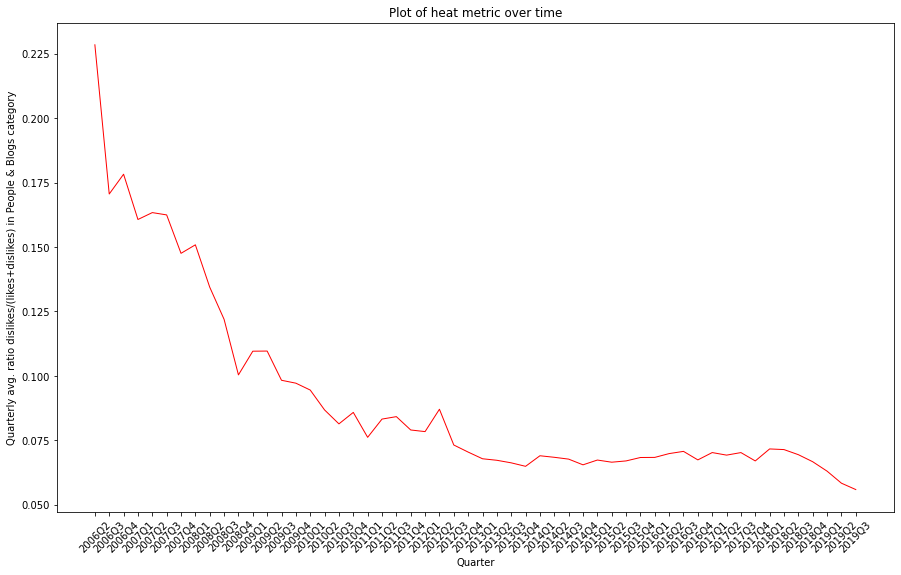

In [12]:
blogs_df = pd.read_pickle('data/blogs.tsv.gz')
blogs_df['upload_date'] = pd.to_datetime(blogs_df['upload_date'], errors='coerce')
blogs_df['metric_2'] = blogs_df['dislike_count']/(blogs_df['like_count']+blogs_df['dislike_count'])
# Heat Metric used  --> Dividing the number of dislikes by the numebr of likes + dislikes
# Grouping by month for metric
grouped_by_month_metric2 = blogs_df.groupby(pd.PeriodIndex(blogs_df['upload_date'], freq="Q"))


metric_2_mean = grouped_by_month_metric2['metric_2'].mean()[1:-1]
metric_2_mean = pd.DataFrame({'mean_ratio' : metric_2_mean}).reset_index()
metric_2_mean = metric_2_mean.set_index('upload_date').resample('Q').asfreq().fillna(0)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(metric_2_mean.index.map(str).to_list(), metric_2_mean['mean_ratio'].to_list(), linewidth=1, color='r')
ax.set_xticklabels(metric_2_mean.index.map(str).to_list(), rotation=45)

plt.xlabel('Quarter')
plt.ylabel('Quarterly avg. ratio dislikes/(likes+dislikes) in People & Blogs category')
plt.title('Plot of heat metric over time')
plt.show()


/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


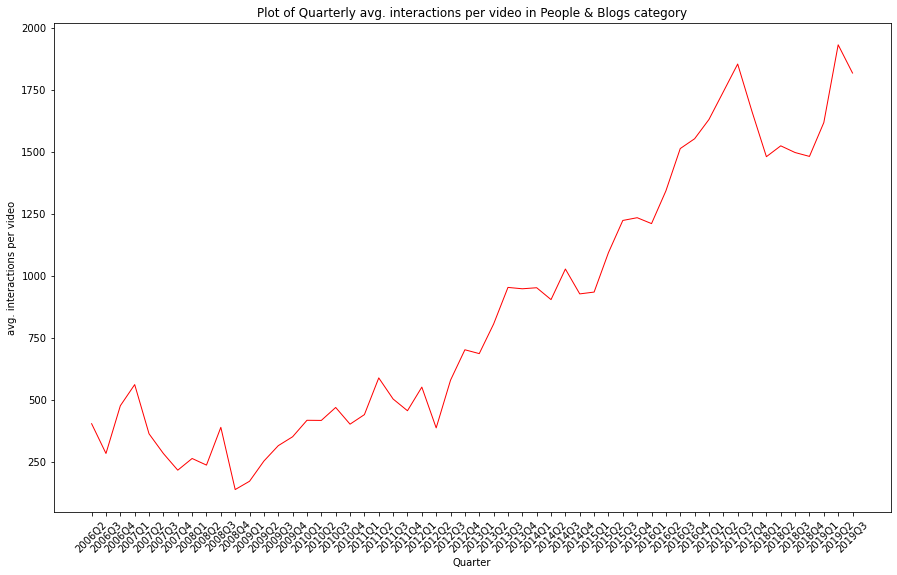

In [13]:
blogs_df = pd.read_pickle('data/blogs.tsv.gz')
blogs_df['upload_date'] = pd.to_datetime(blogs_df['upload_date'], errors='coerce')
blogs_df['interactions'] = (blogs_df['like_count']+blogs_df['dislike_count'])
# Heat Metric used  --> Dividing the number of dislikes by the numebr of likes + dislikes
# Grouping by month for metric
grouped_by_month = blogs_df.groupby(pd.PeriodIndex(blogs_df['upload_date'], freq="Q"))


interactions = grouped_by_month['interactions'].mean()[1:-1]
interactions = pd.DataFrame({'interactions' : interactions}).reset_index()
interactions = interactions.set_index('upload_date').resample('Q').asfreq().fillna(0)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(interactions.index.map(str).to_list(), interactions['interactions'].to_list(), linewidth=1, color='r')
ax.set_xticklabels(interactions.index.map(str).to_list(), rotation=45)

plt.xlabel('Quarter')
plt.ylabel('avg. interactions per video')
plt.title('Plot of Quarterly avg. interactions per video in People & Blogs category')
plt.show()


##### **Q2** Youtube “negativity tone” has been used as a political weapon? Who initiated this tone and benefited from it?

We will focus on the presidents/presidential candidiates to show who benifited the most from youtube. 
We will try to analyse and compare between:
- Donald Trump
- Barack Obama
- Hillary Clinton

On three different aspects:

- Coverage and Publicity (which we will measure by views count/videos count).
- Polarization (which we will measure with our heat metric).
- Sentiment (which can be measured with the sentiment analysis model we showed earlier).

Here we will only show the comparison in coverage and Publicity. The rest will be done in the final submission. 

We search for the names of the 3 figures in the videos discription and only keep the videos where the nemes appear. We save the dataframes on disk.

In [77]:
# trump
columns = ['categories', 'channel_id', 'crawl_date', 'description',
       'dislike_count', 'display_id', 'duration', 'like_count', 'tags',
       'title', 'upload_date', 'view_count']
trump_df = pd.DataFrame(columns=columns)
for chunk in tqdm(pd.read_csv('data/yt_metadata_reduced.tsv.gz', chunksize=10**5, names=columns)):
    trump_df = pd.concat([trump_df, chunk[chunk['description'].astype(str).str.contains('trump', case=False, na=False)]])

print("Number of videos for Trump:", trump_df['display_id'].nunique())
trump_df.to_pickle('./data/trump_data.tsv.gz')
del trump_df

#obama
obama_df = pd.DataFrame(columns=columns)
for chunk in tqdm(pd.read_csv('data/yt_metadata_reduced.tsv.gz', chunksize=10**5, names=columns)):
    obama_df = pd.concat([obama_df, chunk[chunk['description'].str.contains('obama', case=False, na=False)]])

print("Number of videos for Obama:", obama_df['display_id'].nunique())
obama_df.to_pickle('./data/obama_data.tsv.gz')



clinton_df = pd.DataFrame(columns=columns)
for chunk in tqdm(pd.read_csv('data/yt_metadata_reduced.tsv.gz', chunksize=10**5, names=columns)):
    clinton_df = pd.concat([clinton_df, chunk[chunk['description'].astype(str).str.contains('Hillary', case=False, na=False)]])

print("Number of videos for Hillary:", clinton_df['display_id'].nunique())
clinton_df.to_pickle('./data/clinton_data.tsv.gz')


0it [00:00, ?it/s]/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4,6,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
5it [00:10,  2.18s/it]/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
49it [01:33,  2.08s/it]/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
166it [05:23,  1.95s/it]


Number of videos for Trump: 349091


166it [05:02,  1.82s/it]


Number of videos for Obama: 120319


166it [05:12,  1.89s/it]


Number of videos for Hillary: 46336


Number of videos for Trump: 349091

Number of videos for Obama: 120319

Number of videos for Hillary: 46336

Now we compare the number of videos posted for each of the three figures per Quarter.

/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator


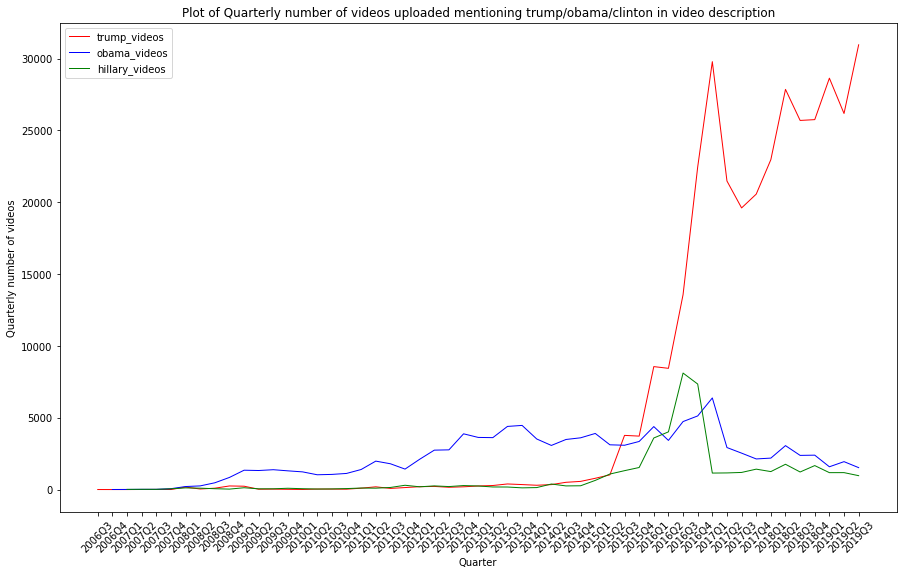

In [81]:
import datetime
trump_df = pd.read_pickle('./data/trump_data.tsv.gz')
obama_df = pd.read_pickle('./data/obama_data.tsv.gz')
clinton_df = pd.read_pickle('./data/clinton_data.tsv.gz')

trump_df['upload_date'] = pd.to_datetime(trump_df['upload_date'], errors='coerce')
trump_df['view_count'] = pd.to_numeric(trump_df['view_count'])
grouped_by_month_trump = trump_df.groupby(pd.PeriodIndex(trump_df['upload_date'], freq="Q"))

obama_df['upload_date'] = pd.to_datetime(obama_df['upload_date'], errors='coerce')
obama_df['view_count'] = pd.to_numeric(obama_df['view_count'])
grouped_by_month_obama = obama_df.groupby(pd.PeriodIndex(obama_df['upload_date'], freq="Q"))

clinton_df['upload_date'] = pd.to_datetime(clinton_df['upload_date'], errors='coerce')
clinton_df['view_count'] = pd.to_numeric(clinton_df['view_count'])
grouped_by_month_clinton = clinton_df.groupby(pd.PeriodIndex(clinton_df['upload_date'], freq="Q"))


videos_cnt_trump  = grouped_by_month_trump['display_id'].nunique()[1:-1]
videos_cnt_trump = pd.DataFrame({'count' : videos_cnt_trump}).reset_index()
videos_cnt_trump = videos_cnt_trump.set_index('upload_date').resample('Q').asfreq().fillna(0)

videos_cnt_obama  = grouped_by_month_obama['display_id'].nunique()[1:-1]
videos_cnt_obama = pd.DataFrame({'count' : videos_cnt_obama}).reset_index()
videos_cnt_obama = videos_cnt_obama.set_index('upload_date').resample('Q').asfreq().fillna(0)

videos_cnt_clinton  = grouped_by_month_clinton['display_id'].nunique()[1:-1]
videos_cnt_clinton = pd.DataFrame({'count' : videos_cnt_clinton}).reset_index()
videos_cnt_clinton = videos_cnt_clinton.set_index('upload_date').resample('Q').asfreq().fillna(0)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(videos_cnt_trump.index.map(str).to_list(), videos_cnt_trump['count'].to_list(), linewidth=1, color='r', label='trump_videos')
ax.plot(videos_cnt_obama.index.map(str).to_list(), videos_cnt_obama['count'].to_list(), linewidth=1, color='b', label='obama_videos')
ax.plot(videos_cnt_clinton.index.map(str).to_list(), videos_cnt_clinton['count'].to_list(), linewidth=1, color='g', label='hillary_videos')

ax.set_xticklabels(videos_cnt_trump.index.map(str).to_list(), rotation=45)


plt.xlabel('Quarter')
plt.ylabel('Quarterly number of videos')
plt.title('Plot of Quarterly number of videos uploaded mentioning trump/obama/clinton in video description')
plt.legend()
plt.show()

/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


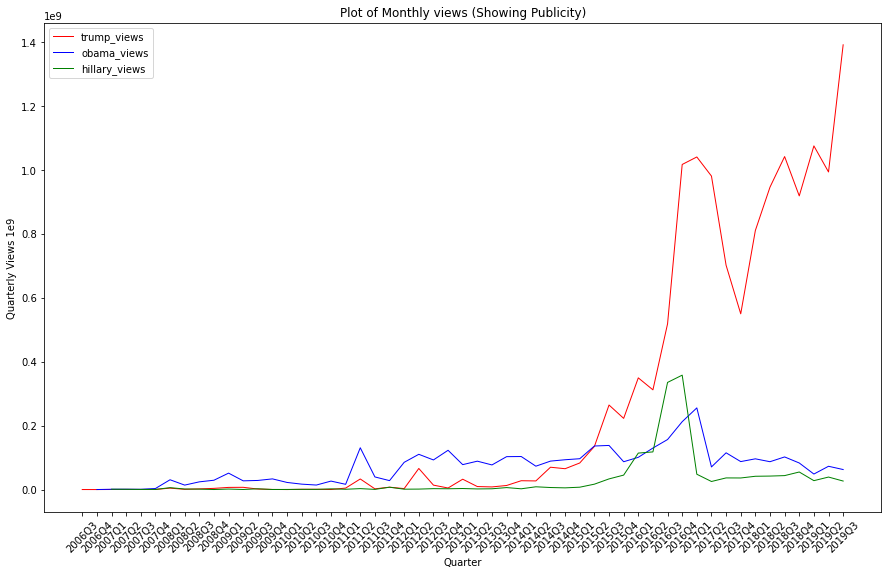

In [82]:
views_cnt_trump  = grouped_by_month_trump['view_count'].sum()[1:-1]
views_cnt_trump = pd.DataFrame({'count' : views_cnt_trump}).reset_index()
views_cnt_trump = views_cnt_trump.set_index('upload_date').resample('Q').asfreq().fillna(0)


views_cnt_obama  = grouped_by_month_obama['view_count'].sum()[1:-1]
views_cnt_obama = pd.DataFrame({'count' : views_cnt_obama}).reset_index()
views_cnt_obama = views_cnt_obama.set_index('upload_date').resample('Q').asfreq().fillna(0)

views_cnt_clinton  = grouped_by_month_clinton['view_count'].sum()[1:-1]
views_cnt_clinton = pd.DataFrame({'count' : views_cnt_clinton}).reset_index()
views_cnt_clinton = views_cnt_clinton.set_index('upload_date').resample('Q').asfreq().fillna(0)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(views_cnt_trump.index.map(str).to_list(), views_cnt_trump['count'].to_list(), linewidth=1, color='r', label='trump_views')
ax.plot(views_cnt_obama.index.map(str).to_list(), views_cnt_obama['count'].to_list(), linewidth=1, color='b', label='obama_views')
ax.plot(views_cnt_clinton.index.map(str).to_list(), views_cnt_clinton['count'].to_list(), linewidth=1, color='g', label='hillary_views')
ax.set_xticklabels(views_cnt_trump.index.map(str).to_list(), rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Quarterly Views 1e9')
plt.title('Plot of Monthly views (Showing Publicity)')
plt.legend()
plt.show()

Seems like trump got much more coverage & publicity from youtube compared to his opponent (hillary) and his predeccessor (obama). 

His videos got more attention as well we measure that with the average views per videos.

/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


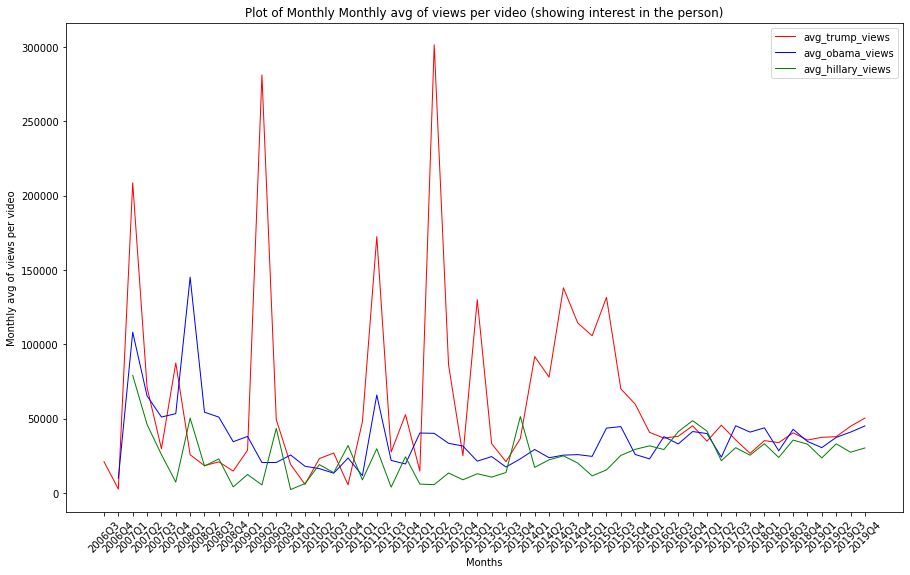

In [83]:
views_cnt_trump  = grouped_by_month_trump['view_count'].mean()[1:]
views_cnt_trump = pd.DataFrame({'count' : views_cnt_trump}).reset_index()
views_cnt_trump = views_cnt_trump.set_index('upload_date').resample('Q').asfreq().fillna(0)


views_cnt_obama  = grouped_by_month_obama['view_count'].mean()[1:]
views_cnt_obama = pd.DataFrame({'count' : views_cnt_obama}).reset_index()
views_cnt_obama = views_cnt_obama.set_index('upload_date').resample('Q').asfreq().fillna(0)

views_cnt_clinton  = grouped_by_month_clinton['view_count'].mean()[1:]
views_cnt_clinton = pd.DataFrame({'count' : views_cnt_clinton}).reset_index()
views_cnt_clinton = views_cnt_clinton.set_index('upload_date').resample('Q').asfreq().fillna(0)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(views_cnt_trump.index.map(str).to_list(), views_cnt_trump['count'].to_list(), linewidth=1, color='r', label='avg_trump_views')
ax.plot(views_cnt_obama.index.map(str).to_list(), views_cnt_obama['count'].to_list(), linewidth=1, color='b', label='avg_obama_views')
ax.plot(views_cnt_clinton.index.map(str).to_list(), views_cnt_clinton['count'].to_list(), linewidth=1, color='g', label='avg_hillary_views')
ax.set_xticklabels(views_cnt_trump.index.map(str).to_list(), rotation=45)
plt.xlabel('Months')
plt.ylabel('Monthly avg of views per video')
plt.title('Plot of Monthly Monthly avg of views per video (showing interest in the person)')
plt.legend()
plt.show()

Trump got much more coverage & publicity & attention from youtube compared to his opponent (hillary) and his predeccessor (obama). 


##### **Q3** Using the radicalization dataset to further explore the use of youtube as a political weapon in the (pre-) election period for 2017.

In order to explore whether youtube contributed to the election victory of the Republicans 2017 (where Trump was elected), our idea is to analyze the statistics of "right" videos compared to the statistics of "left" and "center" videos. 

That is, we study and compare the growth of the amount of published videos for the three categorical videos ("left", "right" and "center") starting in the pre-election period of 2017. On top of that, we also want to analyze the the evolvement of the heat-metric (as described in part 3-Q1-b) during that period to assess the user engagement for the three different political categories.

To do that, we also used an additional dataset ("Radicalization Dataset") which contains the most important 676 channels from different political categories (Alt-right, Alt-light, etc.). This data was created for the paper "Auditing Radicalization Pathways on YouTube" (https://arxiv.org/pdf/1908.08313.pdf). The dataset was provided to us by our mentor and co-author of the paper: Manoel Hortaribeiro.

**Q3.1: Pre-processing data**

In [3]:
#First, we read the data

#radicalization data:
channels_radic_df = pd.read_csv("./data/radic.csv")

In [ ]:
#now we filter the yt_metadata for the channels from the radicalization data
#due to the size of yt_metadata, this code takes a bit to run (~3 minutes)
from tqdm import tqdm

flag = False
chunksize = 10 ** 5

for chunk in tqdm(pd.read_csv("./data/yt_metadata_reduced.tsv.gz", chunksize=chunksize, error_bad_lines=False, engine = "python")):
    chunk = chunk.loc[chunk["channel_id"].isin(channels_radic_df.Id.values)]
    chunk.drop(['crawl_date', 'categories'], axis=1)
    if not flag:
        flag = True
        chunk.to_csv('./data/yt_metadata_reduced_radic.tsv.gz', index = False)
    else:
        chunk.to_csv('./data/yt_metadata_reduced_radic.tsv.gz', mode='a', index = False, header=False)
        

In [4]:
#yt_metadata for all videos from the "radicalization" channels:
videos_radic_df = pd.read_csv("./data/yt_metadata_reduced_radic.tsv.gz")

/var/folders/87/26kj3hvj3_b63zn9y6lwvtcc0000gn/T/ipykernel_11599/3617314876.py:2: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  videos_radic_df = pd.read_csv("./data/yt_metadata_reduced_radic.tsv.gz")


In [5]:
#get all unique political orientations
channels_radic_df.Category.unique()

array(['Alt-lite', 'Alt-right', 'Incel', 'Intellectual Dark Web', 'NONE',
       'MGTOW', 'MRA', 'PUA', 'PUA ', 'center', 'left', 'left-center',
       'right-center', 'right'], dtype=object)

In [6]:
#categorize each of the channels (created a respective column "pol_orient")

#note that we dont categorize "Intellectual Dark Web", since it has supporters from left and right
right = ["Alt-lite", "Alt-right", "Incel", "MGTOW", "MRA", "right"]
left  = ["left"]
center = ["center", "right-center", "left-center"]


def pol_orientation(x):
    if x in right: 
        return "right"
    elif x in left:
        return "left"
    elif x in center:
        return "center"
    else:
        return 0
        
        
channels_radic_df["pol_orient"] = channels_radic_df.Category.apply(pol_orientation)
channels_radic_df

,Name,Category,Data Collection step,Id,pol_orient
0,DailyCallerVideo,Alt-lite,2,UCfDdlNLRVb1h3_7Xh-WhL3w,right
1,Liberty Machine News,Alt-lite,2,UCso6oQ3qy7z61Fr8b0WNBMw,right
2,AIU-Resurrection,Alt-lite,2,UCplXdu0g94UynzYCmO2zOjw,right
3,Tree Of Logic,Alt-lite,2,UCl3RCEtooHD5bhPCHJw3btA,right
4,DailyKenn,Alt-lite,2,UCbukZErY9SjdGTHabMzY7qg,right
...,...,...,...,...,...
671,national rifle association (nra),right,0,UCZr49eSL2aHQ_41476IrkbA,right
672,project veritas,right,0,UCL9PlYkRD3Q-RZca6CCnPKw,right
673,american enterprise institute,right,0,UCt8lRYpzb-sSrKFb4DT2ECw,right
674,ron paul liberty report,right,0,UCkJ1N-7g9Q6n7KnriGit-Ig,right


In [7]:
#match the pol_orient to the videos based on its channel
#takes a bit to run (~2 minutes)
def orient_match(x):
    var = channels_radic_df.loc[channels_radic_df["Id"] == x]["pol_orient"].values
    if len(var) > 0:
        return var[0]
    else:
        return 0

videos_radic_df["pol_orient"] = videos_radic_df["channel_id"].apply(orient_match)
videos_radic_df

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,pol_orient
0,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:47:10.520209,👕 Order your shirts here: https://Teespring.co...,195.0,MBgzne7djFU,378,47027.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",Elizabeth Warren Gets a Big Surprise at the Ai...,2019-10-03 00:00:00,374711.0,right
1,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:16.481889,👕 Order your shirts here: https://Teespring.co...,114.0,AbH3pJnFgY8,278,36384.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",No More Twitter? 😂,2019-10-02 00:00:00,245617.0,right
2,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:17.137786,👕 Order your shirts here: https://Teespring.co...,143.0,QBuwj_h1SH4,385,40597.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",The Only Thing Stopping Them 😂,2019-10-01 00:00:00,299535.0,right
3,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:17.823119,👕 Order your shirts here: https://Teespring.co...,193.0,Reogq26-KpI,419,42658.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",Speaking of Losers...,2019-09-30 00:00:00,357126.0,right
4,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:18.497042,👕 Order your shirts here: https://Teespring.co...,136.0,uBY9OtlSnX8,414,44246.0,"Funny,Entertainment,Laughing,Educational,Learn...",The Circus Continues!,2019-09-27 00:00:00,297704.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228725,People & Blogs,UCs-brcHDxKqrOGU9cEWuCMQ,2019-11-13 02:57:16.081645,MGTOW: The Dark Side of Female Sexuality.\nThe...,35.0,jAclz1oy_q4,896,306.0,"MGTOW,Female,Sexuality,Male,Feminism,Female Se...",MGTOW: The Dark Side of Female Sexuality.,2016-02-10 00:00:00,20176.0,right
228726,People & Blogs,UCs-brcHDxKqrOGU9cEWuCMQ,2019-11-13 02:57:16.688428,Black Widow Spiders and Modern Women - MGTOW\n...,18.0,QOjI2f0lc98,1027,505.0,"MGTOW,Mating Rituals,Modern Women,Black Widow,...",Black Widow Spiders and Modern Women - MGTOW,2016-02-03 00:00:00,12157.0,right
228727,People & Blogs,UCs-brcHDxKqrOGU9cEWuCMQ,2019-11-13 02:57:17.309036,MGTOW: Going Crazy Death by a thousand cuts ev...,3.0,p221TExEgDY,705,47.0,"MGTOW:,Going Crazy,Howard Dare,Suffering,Ratio...",MGTOW: Going Crazy,2016-01-15 00:00:00,675.0,right
228728,People & Blogs,UCs-brcHDxKqrOGU9cEWuCMQ,2019-11-13 02:57:17.866052,Men and boys have been conditioned for centuri...,1.0,CKAFnI6oWVo,649,121.0,"The Sacrificial Male,feminism,MGTOW,sex,female...",MGTOW: The Sacrificial Male,2016-01-14 00:00:00,1664.0,right


**Q3.2: Data Exploration**

@ESRAA:

TODO: visualize data (distribution over different pol_orient, ...)

**Q3.3: Data Analysis**

**(a) Growth comparison of politically categorized videos in (pre-) election period of Donald Trump**

As described before, we study and compare the growth of the view_count for the three categorical videos ("left", "right" and "center") starting in the pre-election period of 2017.

In [11]:
videos_radic_df.upload_date = pd.to_datetime(videos_radic_df.upload_date, errors='coerce')
videos_radic_df = videos_radic_df.set_index("upload_date")
videos_radic_df = videos_radic_df[videos_radic_df.pol_orient != 0]

/var/folders/87/26kj3hvj3_b63zn9y6lwvtcc0000gn/T/ipykernel_11599/727714728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos_radic_df.upload_date = pd.to_datetime(videos_radic_df.upload_date, errors='coerce')


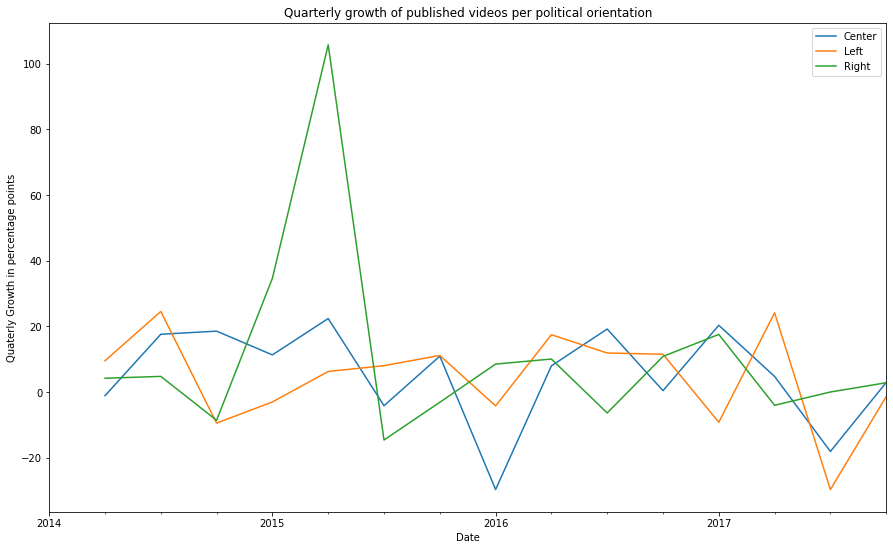

In [17]:
#growth of released videos per political orientation category ("left", "center", or "right") per quarter in the (pre-)election period of 2017
videos_sorted = videos_radic_df.groupby("pol_orient").resample("Q").title.count()
videos_sorted = videos_sorted.unstack(level=0).dropna()
videos_sorted = videos_sorted[videos_sorted.index > pd.Timestamp("2014-01-01")]
videos_sorted = videos_sorted[videos_sorted.index < pd.Timestamp("2018-01-01")]


perc_change = videos_sorted.pct_change()*100
perc_change.plot(figsize=(15, 9))
plt.title("Quarterly growth of published videos per political orientation")
plt.legend(["Center", "Left", "Right"])
plt.xlabel("Date")
plt.ylabel("Quaterly Growth in percentage points")

plt.show()

We can observe a very strong growth (over 100%) of published videos in the last quarter of 2014 and first quarter of 2015. Besides that, we cannot clearly say that either one of the three categories grew strictly stronger than the others. To get an additional view on the user engagement for the three different political categories, we will study in the following the Heat-metric of each of the political categories over time.

**(b) Heat-Metric comparison of politically categorized videos in (pre-) election period of Donald Trump**

Also as describe in before, we want to analyze also the the evolvement of the heat-metric during that period to assess the user engagement for the three different political categories. We have shown the feasibility of this metric-calculation in part 3-Q1-b, so we will apply it analoguously to this data-subset.

---

**Failed ideas:** 

classifying videos to rght/left/center based on keywords+sentiment.

In [8]:

out = sent_analysis(trump_df['description'].to_list())
print(len(out))
temp = pd.DataFrame.from_dict(out)
temp.to_pickle('./data/trump_sent.tsv.gz')


255420


In [9]:
# print(len(temp['score']))

#trump_df = pd.read_pickle('./data/trump_data.tsv.gz')
#temp = pd.read_pickle('./data/trump_sent.tsv.gz')
print(len(temp['score']))
print(len(trump_df))
trump_df = trump_df.set_index(temp.index)
trump_df = trump_df.join(temp['label'])
trump_df = trump_df.join(temp['score'])


255420
255420


In [10]:

# trump_df = trump_df.loc[trump_df['label']!= 'NEU']

# trump_df = trump_df.drop(['sentiment', 'categories', 'crawl_date'], axis=1)

trump_df['label'] = trump_df['label'].map({'POS': 1.,'NEU':0., 'NEG': -1.})
#print((trump_df['sentiment']*trump_df['score']).head(5))
trump_df['score'] = trump_df['label']*trump_df['score']

#trump_df = trump_df[['channel_id', 'agg']]
# print(trump_df)
tmp = trump_df.groupby(['channel_id'])['score'].mean()
print(tmp.head(5))
df = pd.DataFrame({'score' : tmp}).reset_index()
df.head(5)
df.to_pickle('./data/trump_classified.tsv.gz')
# print(x[:10])



channel_id
UC--6E6EpybocdaNlPhvK_9A    0.000000
UC-1Hd_LdAj766JDS_ILKEig   -0.324748
UC-2MJlKSq9_pYk5-bdvMhnw   -0.095283
UC-2WWk_2TkYzYM2dW8UCcXQ    0.000000
UC-3jIAlnQmbbVMV6gR7K8aQ   -0.476674
Name: score, dtype: float64


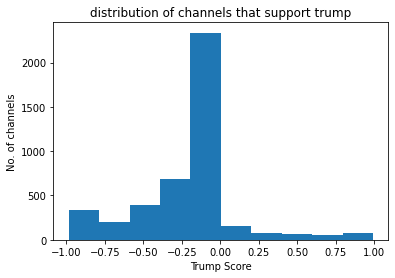

In [11]:
import matplotlib.pyplot as plt

plt.hist(tmp.to_list())
plt.xlabel('Trump Score')
plt.ylabel('No. of channels')
plt.title('distribution of channels that support trump')
plt.show()


In [5]:
columns = ['categories', 'channel_id', 'crawl_date', 'description',
       'dislike_count', 'display_id', 'duration', 'like_count', 'tags',
       'title', 'upload_date', 'view_count']
obama_df = pd.DataFrame(columns=columns)
for chunk in tqdm(pd.read_csv('data/yt_metadata_reduced.tsv.gz', chunksize=10**5, names=columns)):
    obama_df = pd.concat([obama_df, chunk[chunk['description'].str.contains('obama', case=False, na=False)]])

print(obama_df['display_id'].nunique())

0it [00:00, ?it/s]/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4,6,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
5it [00:08,  1.85s/it]/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
49it [01:27,  1.93s/it]/home/ewais/anaconda3/envs/deca-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
166it [05:02,  1.82s/it]

120319


In [6]:
out = sent_analysis(obama_df['description'].to_list())
print(len(out))
temp = pd.DataFrame.from_dict(out)

120466


In [7]:
temp.to_pickle('./data/obama_sent.tsv.gz')
obama_df.to_pickle('./data/obama_data.tsv.gz')

In [8]:
obama_df = obama_df.set_index(temp.index)
obama_df = obama_df.join(temp['label'])
obama_df = obama_df.join(temp['score'])


channel_id
UC-2MJlKSq9_pYk5-bdvMhnw   -0.043446
UC-3jIAlnQmbbVMV6gR7K8aQ   -0.205013
UC-5dIHmtQzHIdNCs7-bEdCA   -0.191921
UC-6DpdmxyEh6oPQb0gVKMiQ    0.000000
UC-7HtwLZzpdC6jdGl21QukQ   -0.384928
Name: score, dtype: float64


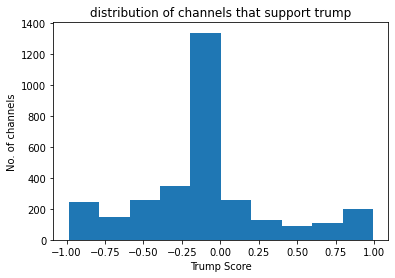

In [9]:
obama_df['label'] = obama_df['label'].map({'POS': 1.,'NEU':0., 'NEG': -1.})
obama_df['score'] = obama_df['label']*obama_df['score']
tmp = obama_df.groupby(['channel_id'])['score'].mean()
print(tmp.head(5))
df = pd.DataFrame({'score' : tmp}).reset_index()
df.head(5)
df.to_pickle('./data/obama_classified.tsv.gz')
import matplotlib.pyplot as plt

plt.hist(tmp.to_list())
plt.xlabel('Obama Score')
plt.ylabel('No. of channels')
plt.title('distribution of channels that support obama')
plt.show()